<a href="https://colab.research.google.com/github/payares0510/metodos-computacionales-1/blob/main/Solucion_parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El campo gravitacional g_k en (x=0.0, y=0.0, z=0.2) es: -9.813513259957665
Valor esperado de g: -9.813646
Error absoluto: 0.00013274004233565506


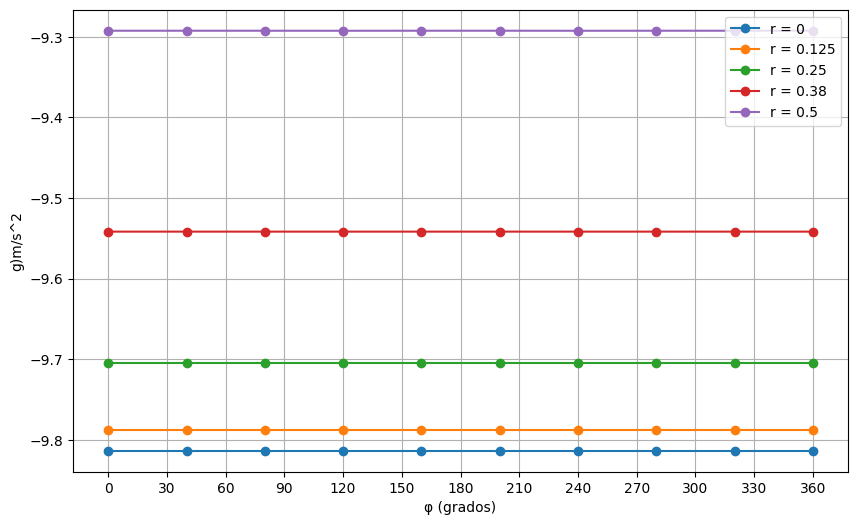

In [ ]:
#punto 24#
import numpy as np
import matplotlib.pyplot as plt
k = 1.942903960
R_disk = 1.0
R= R_disk
N = 50


def integrando(r, phi, x, y, z):
    numerador = z * r
    denominador = (x**2 + y**2 + z**2 + r**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi)) ** 1.5
    return numerador / denominador


def cuadratura_doble_gauss(f, a, b, c, d, n):
    xi, wi = np.polynomial.legendre.leggauss(n)

    r_points = 0.5 * (b - a) * xi + 0.5 * (b + a)
    r_weights = 0.5 * (b - a) * wi

    phi_points = 0.5 * (d - c) * xi + 0.5 * (d + c)
    phi_weights = 0.5 * (d - c) * wi

    R_mesh, Phi_mesh = np.meshgrid(r_points, phi_points, indexing='ij')
    W_r, W_phi = np.meshgrid(r_weights, phi_weights, indexing='ij')
    W = W_r * W_phi

    Z = f(R_mesh, Phi_mesh)

    integral = np.sum(W * Z)

    return integral

def campo_gravitacional(x, y, z, R, n):
    a = 0
    b = R_disk
    c = 0
    d = 2 * np.pi

    def f(r, phi):
        return integrando(r, phi, x, y, z)

    integral = cuadratura_doble_gauss(f, a, b, c, d, n)

    rta = -k * integral

    return rta

if __name__ == "__main__":
    x = 0.0
    y = 0.0
    z = 0.2

    g_k = campo_gravitacional(x, y, z, R, N)

    print(f"El campo gravitacional g_k en (x={x}, y={y}, z={z}) es: {g_k}")

    g_teorica = -9.813646
    error = abs(g_k - g_teorica)
    print(f"Valor esperado de g: {g_teorica}")
    print(f"Error absoluto: {error}")

r_values = [0, 0.125, 0.25, 0.38, 0.5]
phi_values = np.linspace(0, 2 * np.pi, 10)
z = 0.2

results = {}

for r in r_values:
    g_k_values = []
    for phi in phi_values:
        x = r * np.cos(phi)
        y = r * np.sin(phi)
        g_k = campo_gravitacional(x, y, z, R_disk, N)
        g_k_values.append(g_k)
    results[r] = g_k_values

phi_degrees = np.degrees(phi_values)

plt.figure(figsize=(10, 6))

for r in r_values:
    plt.plot(phi_degrees, results[r], marker='o', label=f'r = {r}')

plt.xlabel('φ (grados)')
plt.ylabel('g)m/s^2')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 361, 30))
plt.show()

In [ ]:
#punto 27#

import numpy as np

def ecuaciones(x0, x1, x2, x3, w0, w1, w2, w3):
    eq1 = w0 + w1 + w2 + w3 - 2
    eq2 = w0*x0 + w1*x1 + w2*x2 + w3*x3
    eq3 = w0*x0**2 + w1*x1**2 + w2*x2**2 + w3*x3**2 - 2/3
    eq4 = w0*x0**3 + w1*x1**3 + w2*x2**3 + w3*x3**3
    eq5 = w0*x0**4 + w1*x1**4 + w2*x2**4 + w3*x3**4 - 2/5
    eq6 = w0*x0**5 + w1*x1**5 + w2*x2**5 + w3*x3**5
    eq7 = w0*x0**6 + w1*x1**6 + w2*x2**6 + w3*x3**6 - 2/7
    eq8 = w0*x0**7 + w1*x1**7 + w2*x2**7 + w3*x3**7
    return np.array([eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8])

def jacobiano(x0, x1, x2, x3, w0, w1, w2, w3):
    J = np.zeros((8, 8))
    x = [x0, x1, x2, x3]
    w = [w0, w1, w2, w3]

    J[0, 4:] = 1

    for i in range(4):
        xi = x[i]
        wi = w[i]

        J[1, i] = wi
        J[1, i+4] = xi

        J[2, i] = 2 * wi * xi
        J[2, i+4] = xi ** 2

        J[3, i] = 3 * wi * xi ** 2
        J[3, i+4] = xi ** 3

        J[4, i] = 4 * wi * xi ** 3
        J[4, i+4] = xi ** 4

        J[5, i] = 5 * wi * xi ** 4
        J[5, i+4] = xi ** 5

        J[6, i] = 6 * wi * xi ** 5
        J[6, i+4] = xi ** 6

        J[7, i] = 7 * wi * xi ** 6
        J[7, i+4] = xi ** 7

    return J

def objectivo(x):
    F = ecuaciones(*x)
    return 0.5 * np.dot(F, F)

def gradiente(x):
    F = ecuaciones(*x)
    J = jacobiano(*x)
    grad = np.dot(J.T, F)
    return grad
np.random.seed(0)
x_inicial = np.random.uniform(-1., 1., size=8)

gamma = 0.01
max_iter = 10000
tolerancia = 1e-8

x = x_inicial.copy()
for k in range(max_iter):
    grad = gradiente(x)
    grad_norm = np.linalg.norm(grad)
    if grad_norm < 0.005:
        gamma = 0.001

    if grad_norm < tolerancia:
        print(f"Convergencia alcanzada en {k} iteraciones.")
        break

    x -= gamma * grad
else:
    print("Se alcanzó el número máximo de iteraciones sin convergencia.")

x0, x1, x2, x3, w0, w1, w2, w3 = x
print("\nPuntos y pesos estimados:")
print(f"x0 = {x0}, w0 = {w0}")
print(f"x1 = {x1}, w1 = {w1}")
print(f"x2 = {x2}, w2 = {w2}")
print(f"x3 = {x3}, w3 = {w3}")

F = ecuaciones(*x)
print("\nValores de las ecuaciones (deben ser cercanos a cero):")
for i, eq_value in enumerate(F, 1):
    print(f"eq{i} = {eq_value}")
f_value = objectivo(x)
print(f"\nValor de la función objetivo: {f_value}")

def f(x):
    return np.cos(x)

x_i = np.array([x0, x1, x2, x3])
w_i = np.array([w0, w1, w2, w3])

aproximacion = np.sum(w_i * f(x_i))
valor_exacto = 2 * np.sin(1)
absolute_error = abs(valor_exacto - aproximacion)
relative_error = absolute_error / valor_exacto * 100

print(f"\nAproximación de la integral de cos(x) es: {aproximacion}")
print(f"Valor real de la integral: {valor_exacto}")
print(f"Error absoluto: {absolute_error}")
print(f"Error relativo: {relative_error}%")


Se alcanzó el número máximo de iteraciones sin convergencia.

Puntos y pesos estimados:
x0 = 0.029818658070391368, w0 = 0.46481562715461017
x1 = 0.8062638123696888, w1 = 0.4925914121854156
x2 = 0.06628828096799218, w2 = 0.47887450420910643
x3 = -0.7824549835191379, w3 = 0.5623981441191243

Valores de las ecuaciones (deben ser cercanos a cero):
eq1 = -0.0013203123317433452
eq2 = 0.002711345276577848
eq3 = 0.00038577450007715175
eq4 = -0.011085838261237047
eq5 = 0.0189739659207821
eq6 = 0.0028862337560587314
eq7 = -0.021335537937544002
eq8 = 0.008114980758059595

Valor de la función objetivo: 0.0005107695348135309

Aproximación de la integral de cos(x) es: 1.6822476353913536
Valor real de la integral: 1.682941969615793
Error absoluto: 0.0006943342244394302
Error relativo: 0.04125716970490332%
